<h1>MODULE 2 - ASSIGNMENT 1: CROSS VALIDATION</h1>

**By Group 2:** \
Praveen Maranur \
Jyothi K Vishwanath \
Niyanta Pandey \
Dheeraj Singh Shankar \

# **Introduction**

In this assignment, we aim to build a cross-validated linear regression model to predict the curb weight of a passenger vehicle. The dataset used is sourced from the UC Irvine Machine Learning Archive and consists of 205 observations with 26 attributes. However, only a subset of variables will be used for model building, and the target variable will be the `curb-weight`.

The following steps will be taken to address the problem:
- Exploratory Data Analysis (EDA) to understand the nature of the variables and relationships.
- Construction of multiple linear regression models using selected explanatory variables.
- Evaluation of the models using K-fold cross-validation to determine the best performing model.


<h4> Data Dictonary:

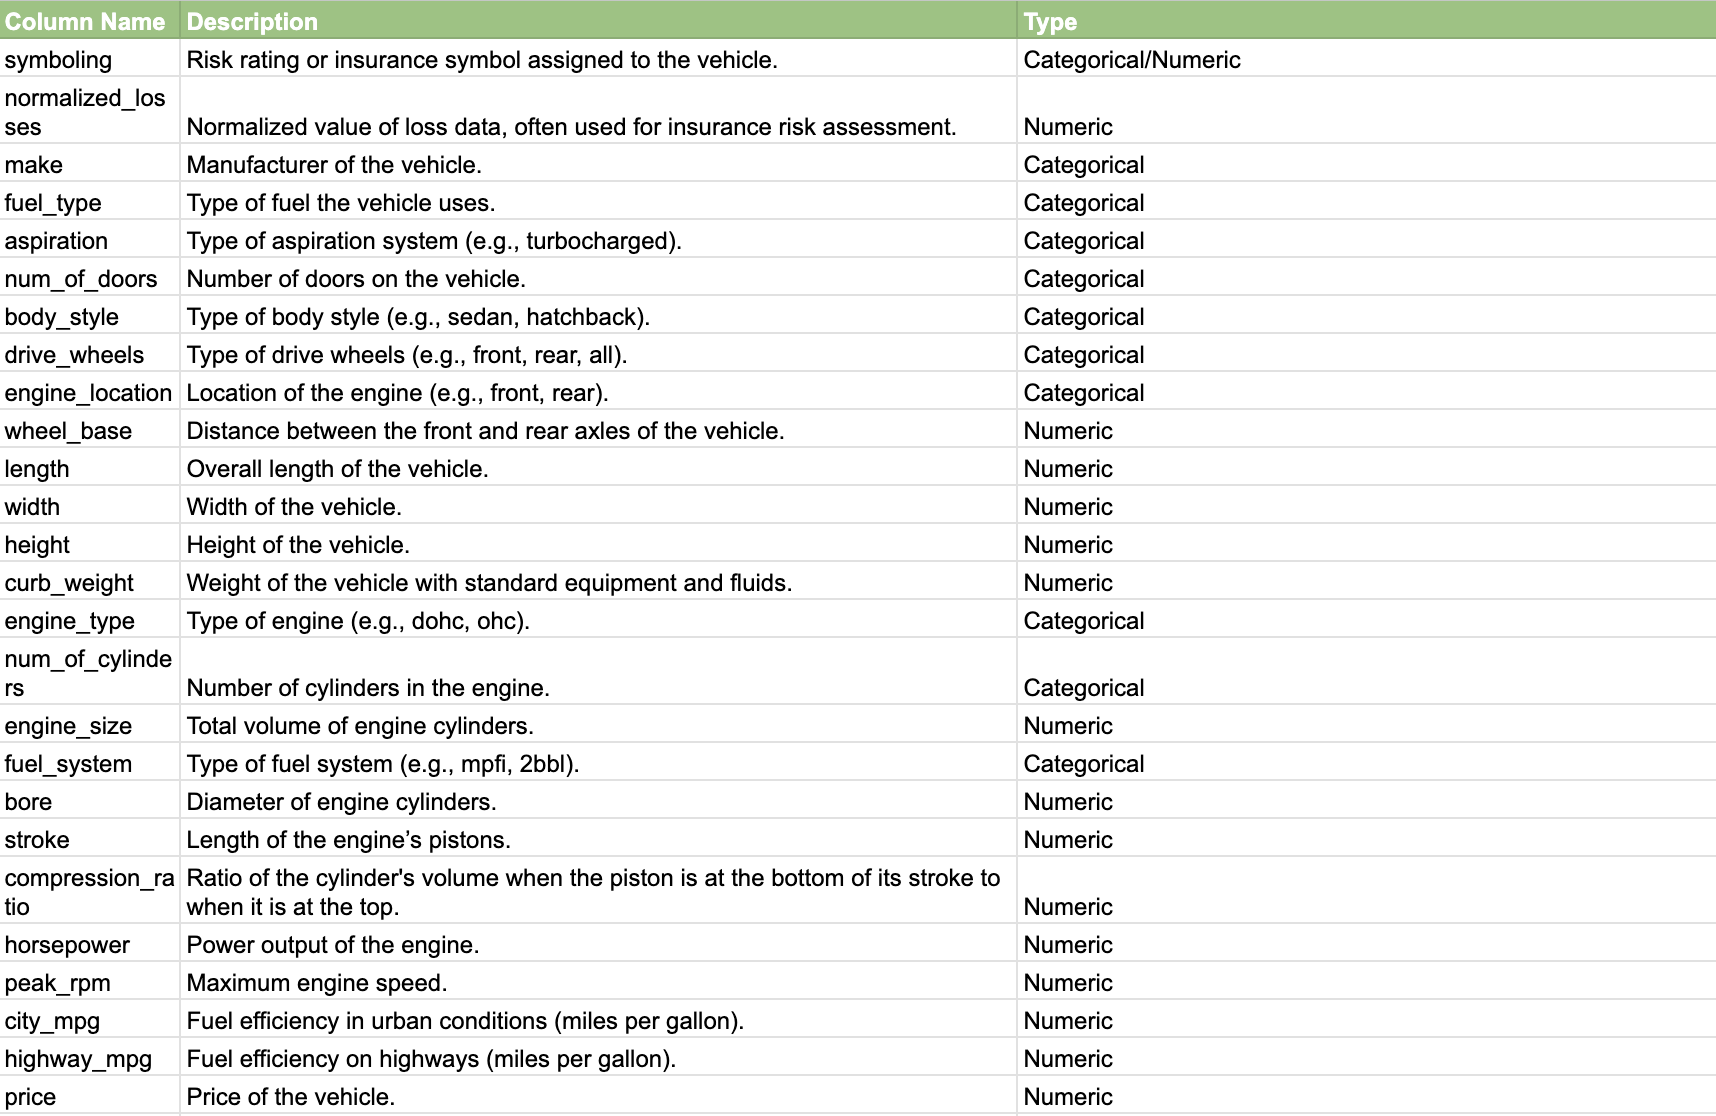

#### **Below mentioned are the steps that we will follow to complete this exercise:**
1) Reading and Understanding the Data\
2) Performing EDA to determine relevant variables for building the multi variable linear regression Model.\
3) Preparing the data for modelling Train Test Split etc. \
4) Training the model. \
5) Predictions, comparison and evaluations of the regression models.

## **STEP- 1 READING AND UNDERSTANDING THE DATA**
1) Importing Data  using the Pandas Library. \
2) Understanding the structure of the data.

In [ ]:
# Importing libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Here, we load the data from the GitHub repository and preview the first few rows to understand its structure and content.


In [ ]:
# Reading the Raw CSV Data from Github.
df = pd.read_csv("https://raw.githubusercontent.com/jk-vishwanath/DAV-6150/refs/heads/main/M2_Data%20(1).csv", header=None)

In [ ]:
df.shape
# we have 26 columns and 205 rows

(205, 26)

In [ ]:
#Viewing the sample of the data.
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Based on the above data sample we understood that we need to add column headers separately to the dataframe.

In [ ]:
# Adding column names to the dataframe created.
df.columns = ['symboling', 'normalized_losses' ,  'make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location',
 'wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio',
 'horsepower','peak_rpm','city_mpg','highway_mpg','price']

In [ ]:
#Viewing sample data with column names.
df.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
# To see how many columns needs a type casting , for example horsepower, price and peak_rpm needs to be converted into numeric variables.
df.info()
df.select_dtypes(include=['object']).columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

Index(['normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'engine_type',
       'num_of_cylinders', 'fuel_system', 'bore', 'stroke', 'horsepower',
       'peak_rpm', 'price'],
      dtype='object')

In [ ]:
#Converting Object data types to numeric data type for data consistency and performing EDA.
ob_to_num_list = ['normalized_losses', 'horsepower', 'peak_rpm', 'price', 'stroke', 'bore']
for i in ob_to_num_list:
  df[i] = pd.to_numeric(df[i], errors='coerce')


In [ ]:
#Viewing  df after changing data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [ ]:
# To summarize the dataset.
df.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Data preparation for EDA
The dataset contains both numerical and categorical variables.

In [ ]:
#Creating two separate dataframes, one for categorical variables and another one for numerical variables
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])


num_list = numeric_data.columns
cat_list = categorical_data.columns

In [ ]:
#Display of numerical variables
num_list

Index(['symboling', 'normalized_losses', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

## **Step 2 : Peforming Exploratory Data Analysis (EDA).**

The dataset contains both numerical and categorical variables. In this section, we will explore the numerical variables relevant to our task, focusing on identifying patterns, outliers, and relationships between the explanatory variables and the response variable `curb-weight`.


**1) Univariate Analysis for Numerical Columns**

We have performed Univariate analysis to describe the distribution, central tendencies, and spread of each variable. This provides insights into the nature of each variable and helps in identifying key patterns, outliers, and potential issues such as skewness or missing values

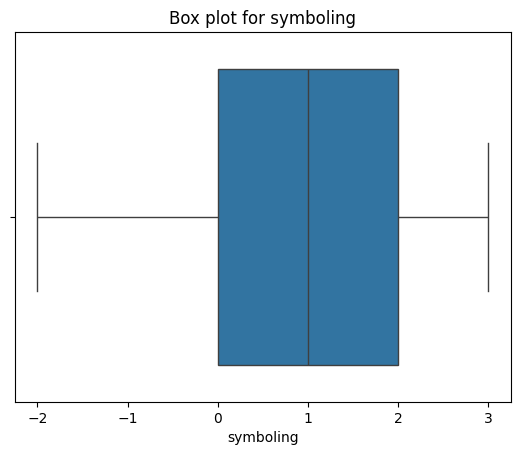

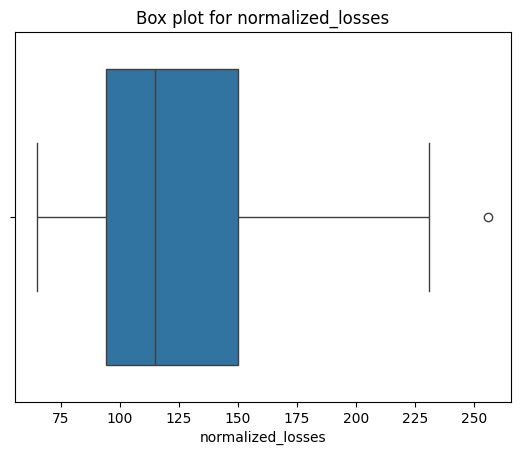

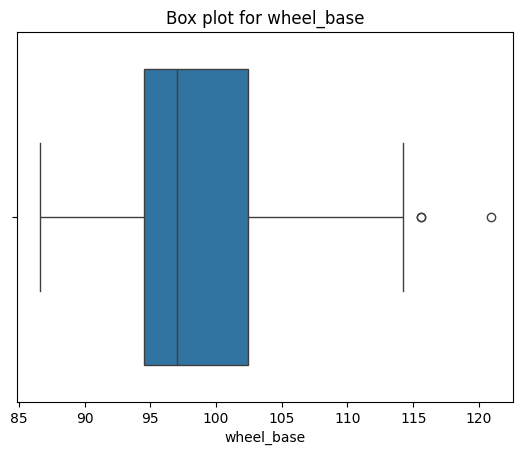

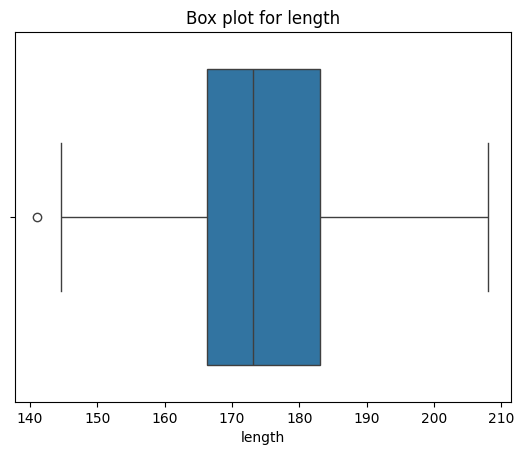

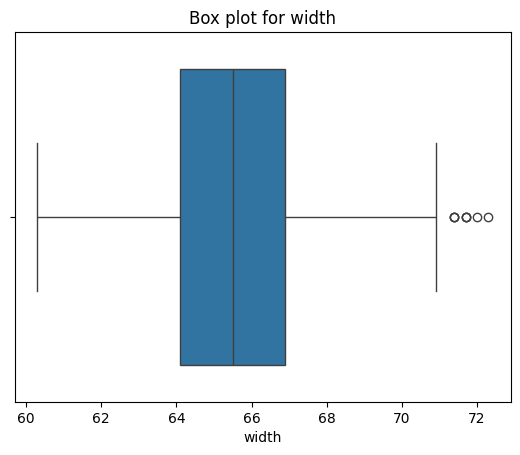

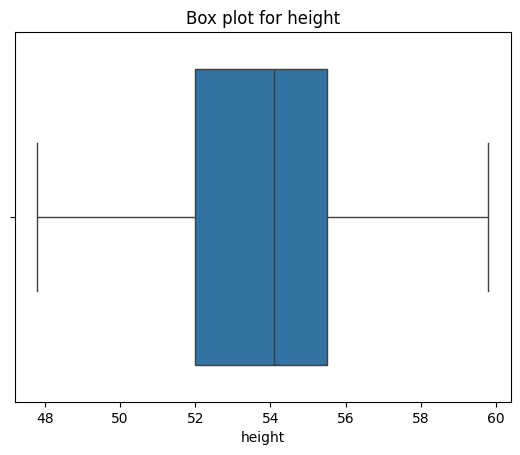

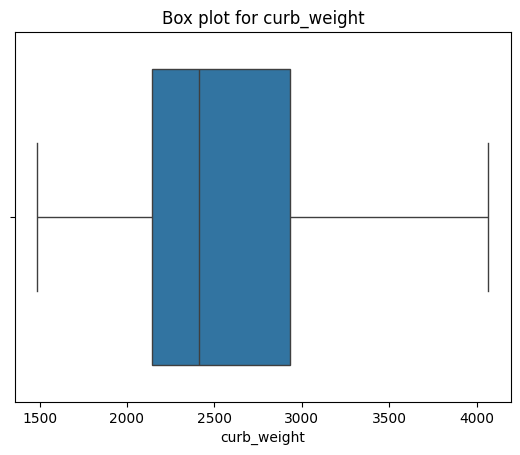

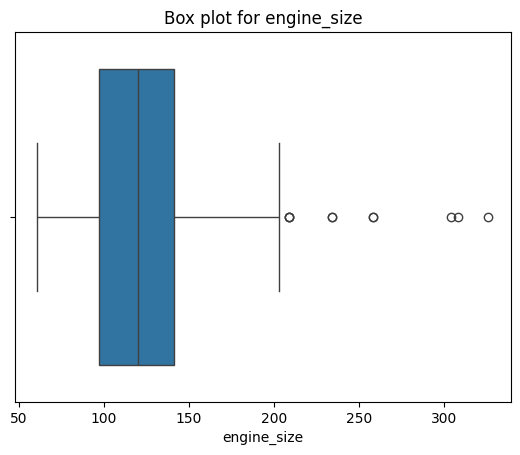

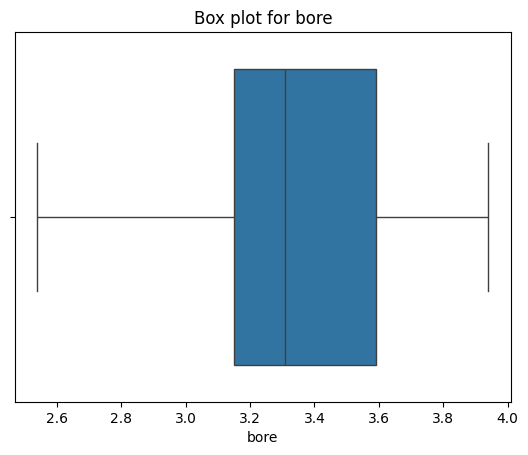

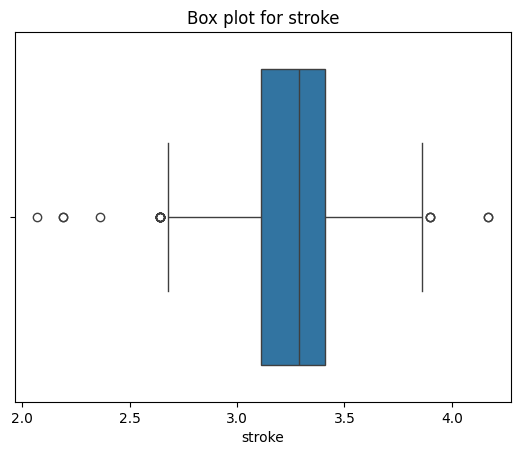

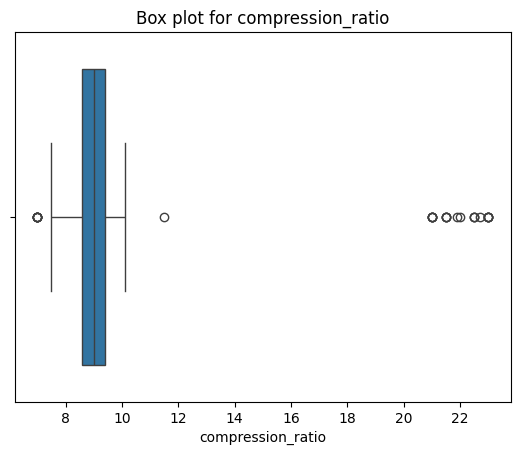

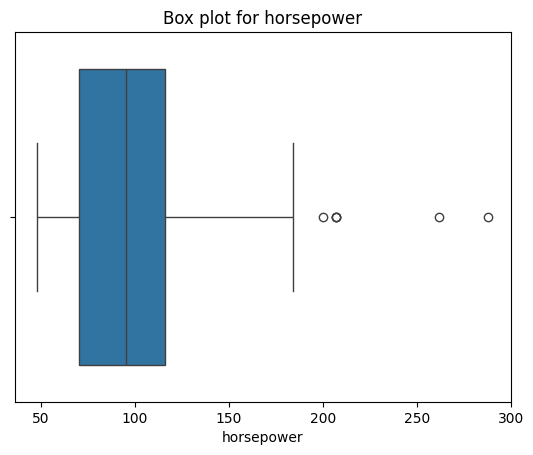

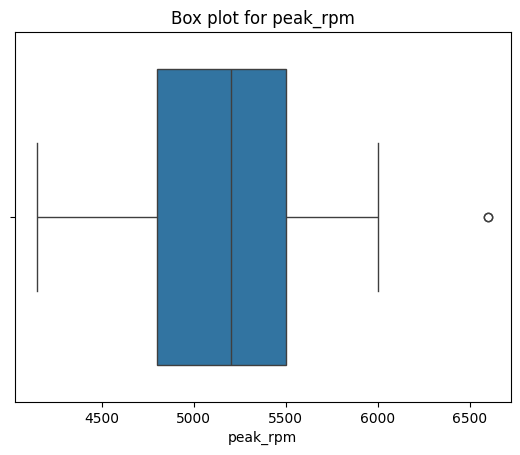

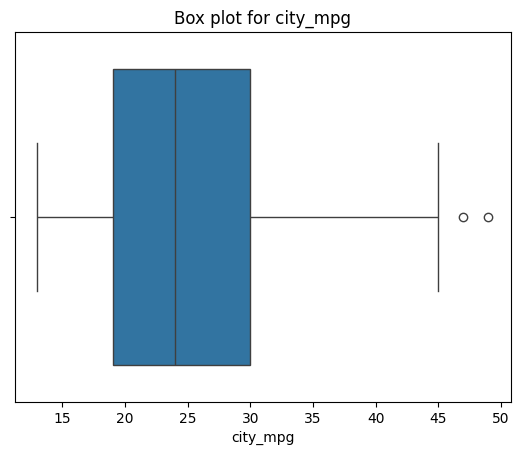

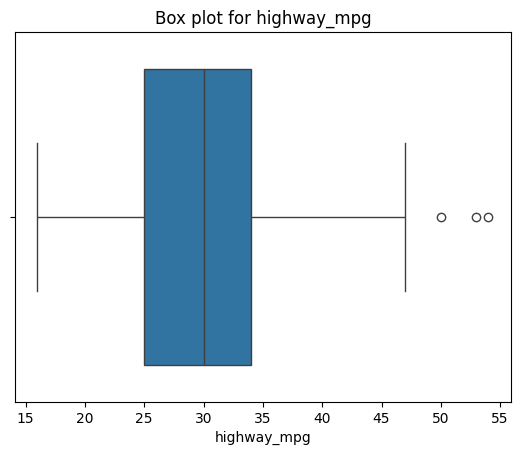

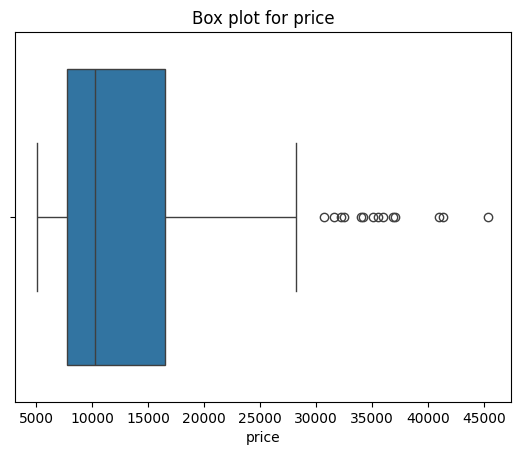

In [ ]:
#Visualizing numerical variables using box plot to understand the outliers better
for i in num_list:
  print('\n')
  sns.boxplot(x=df[i])
  plt.title(f"Box plot for {i}")
  plt.xlabel(i)
  print("\n")
  plt.show()

**2) Bi Variate Analysis for Categorical Columns** \

We have performed bi variabte analysis of categorical variables to examine the relationship between a categorical variable and the target variable (or other variables of interest). This analysis helps determine how different categories influence or correlate with the response variable. However, in this assignment we are majorly focusing on numerical variables, therefore this analysis is done just for our understanding of the data.

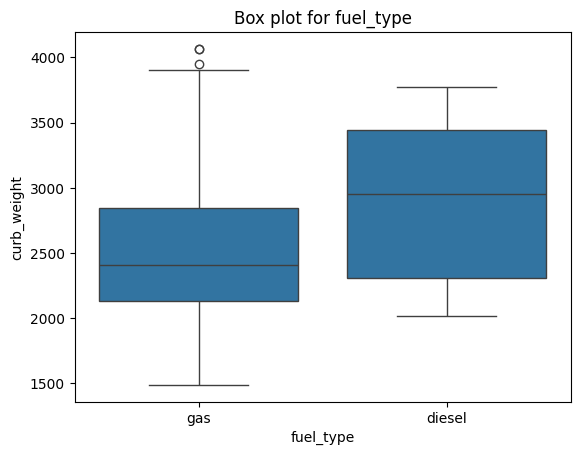

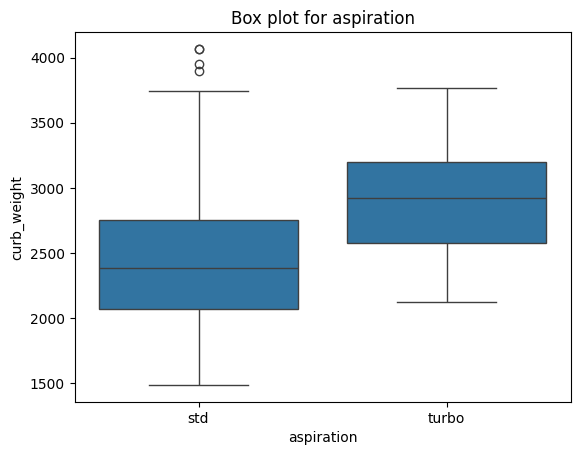

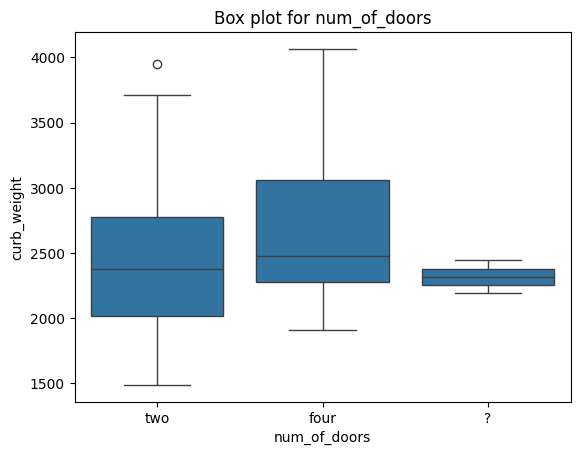

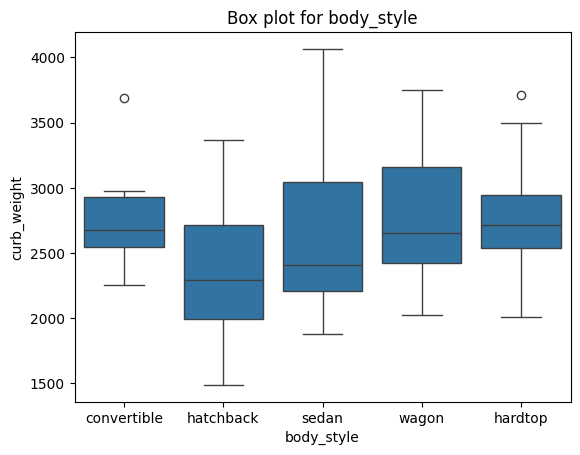

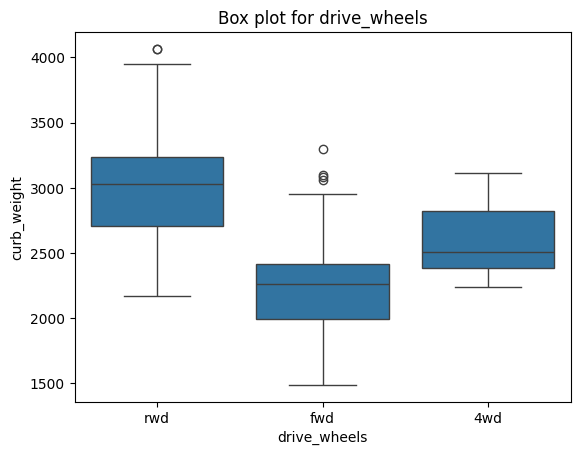

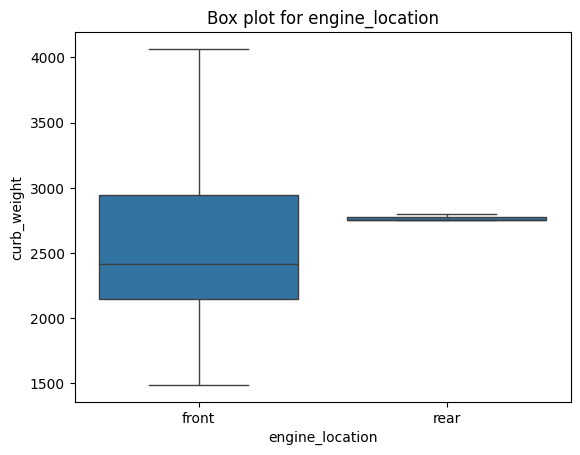

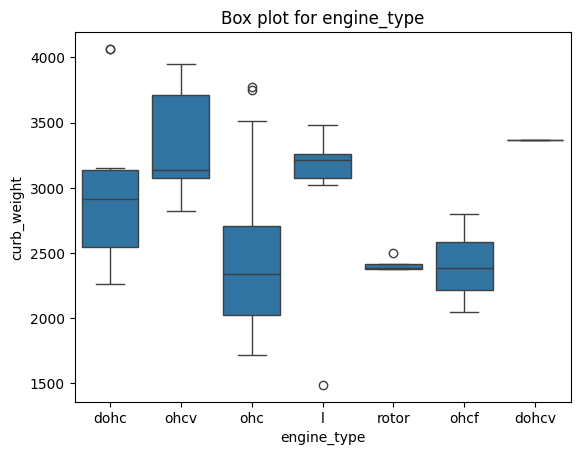

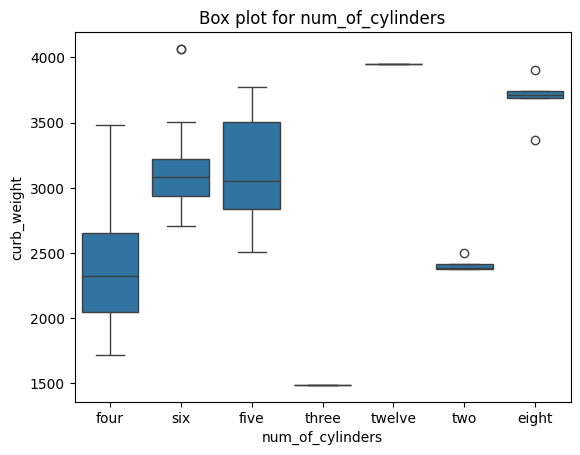

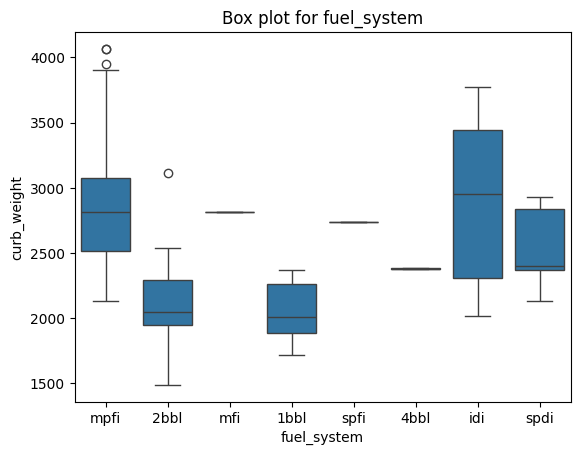

In [ ]:
#Visualizing categorical variables using box plot to understand the outliers better
for i in cat_list:
  print('\n')
  if(i!='make'): #Distribution for make variable is not significant as the data is dispersed for make with too many categories.
    sns.boxplot(x=df[i], y = df['curb_weight'])
    plt.title(f"Box plot for {i}")
    plt.xlabel(i)
    print("\n")
  plt.show()

**3) Bi Variate Analysis for numerical Columns to determine the linear relationship of each variable with the target variable.**  \

In this section, we have done bivariate analysis of numerical variables with respect to the target variable. the goal is to assess the relationship between each predictor and the target, typically to understand the strength and direction of these relationships. This can be done using correlation analysis, reg-scatter plots, and regression lines.


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



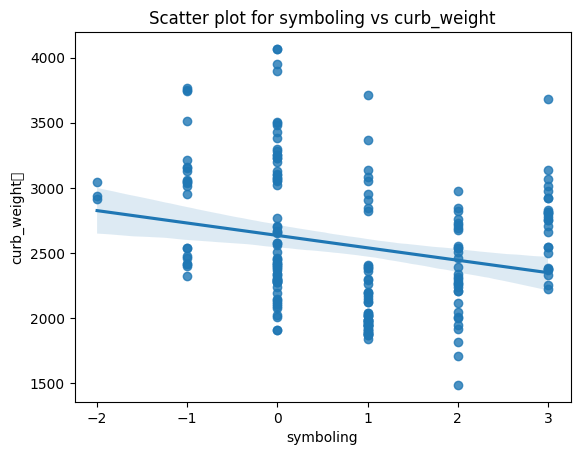

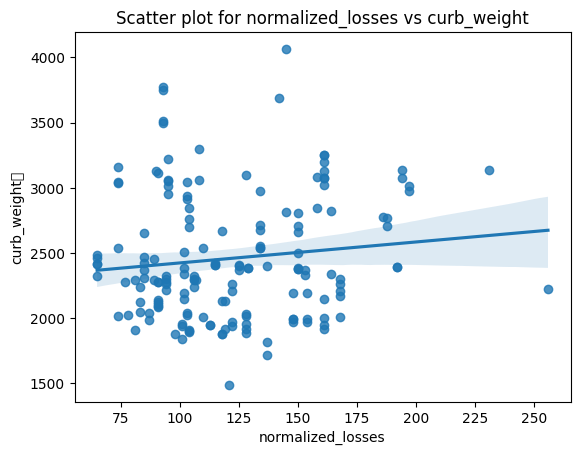

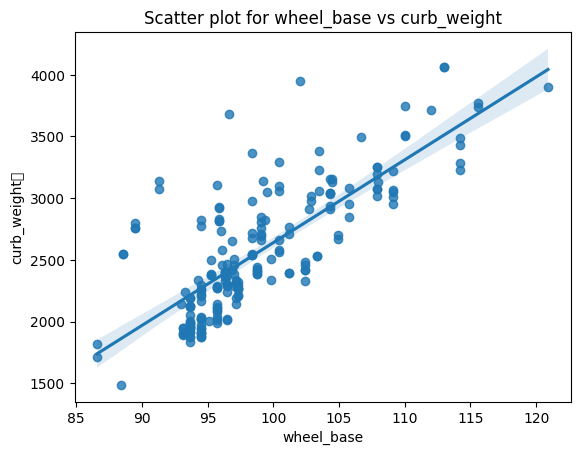

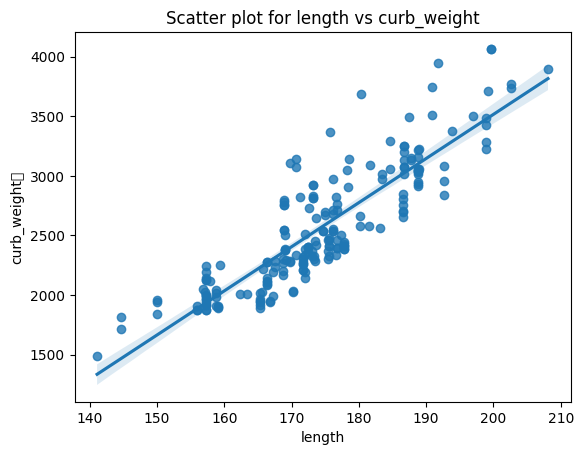

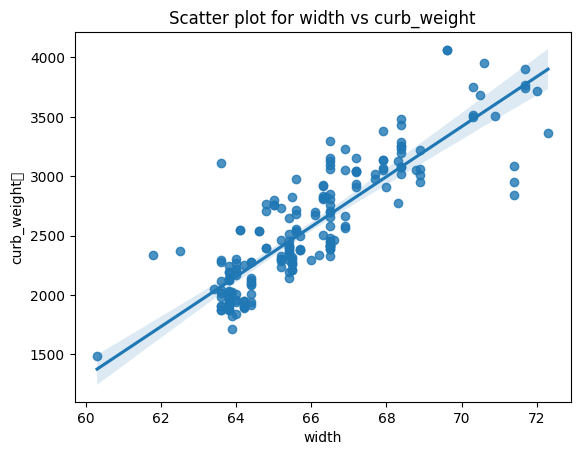

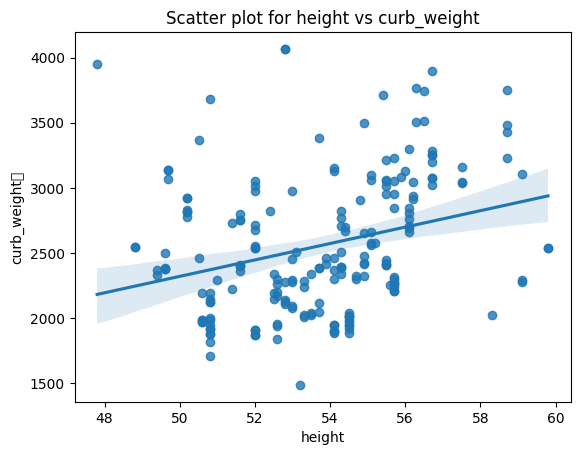

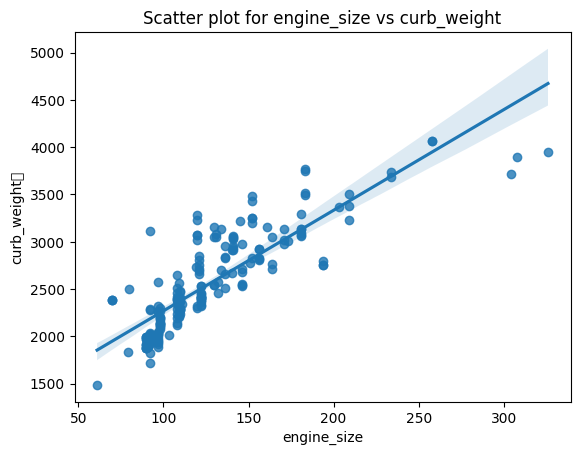

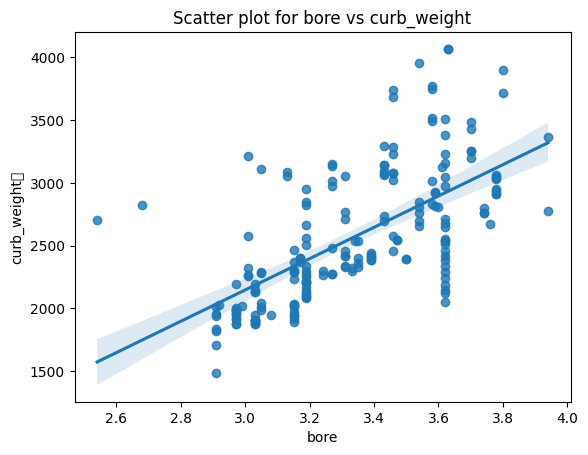

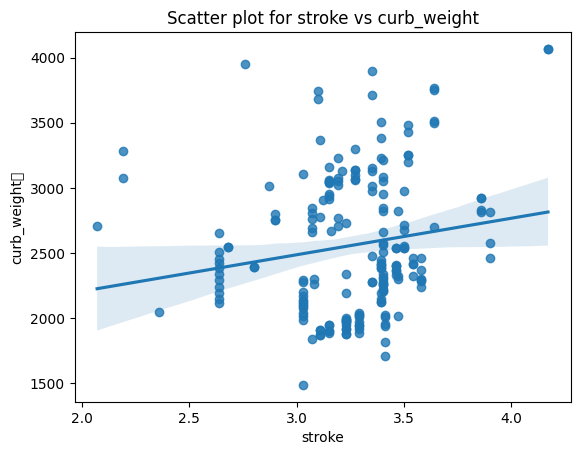

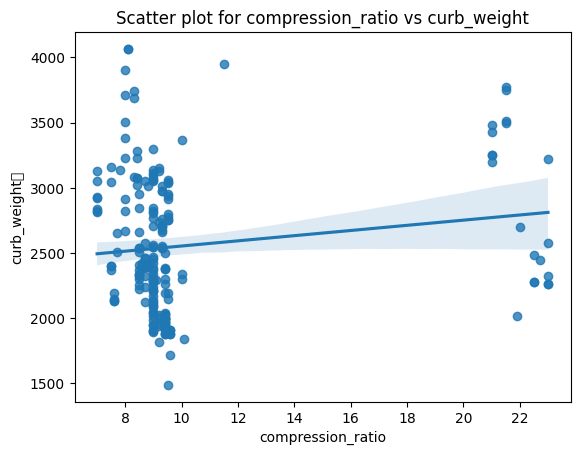

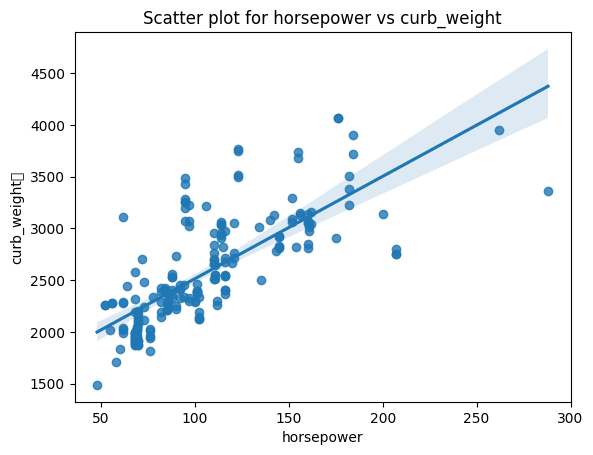

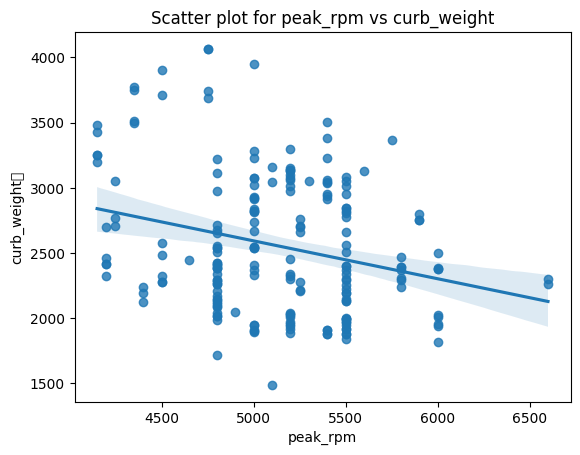

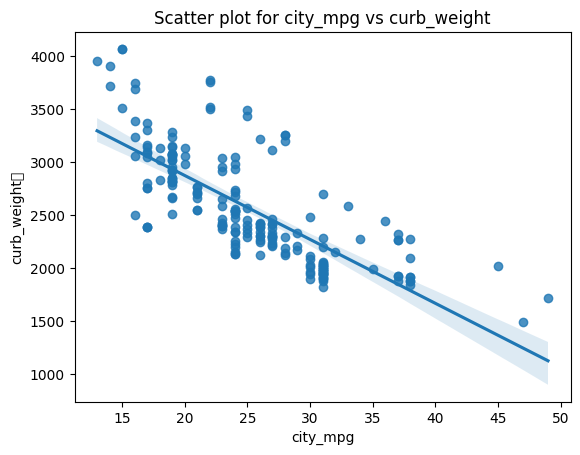

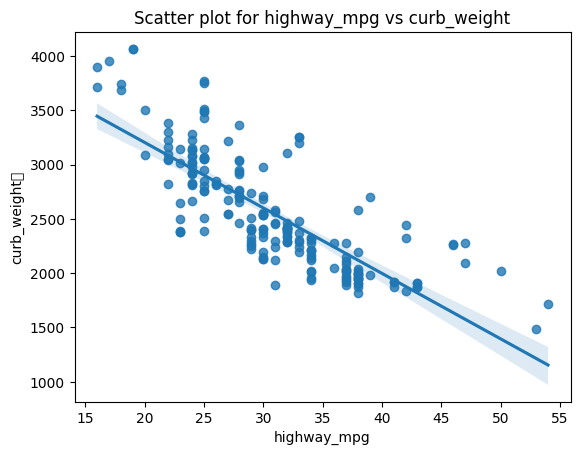

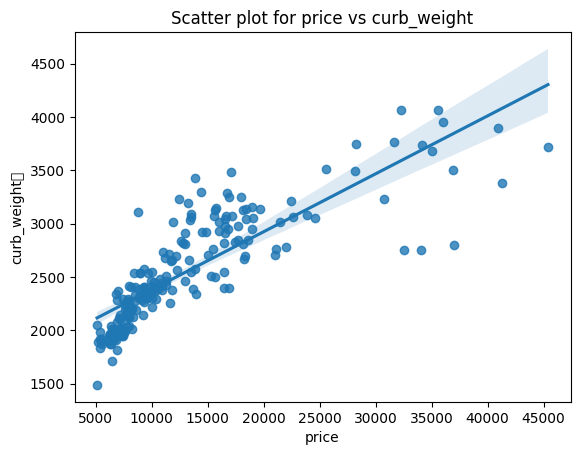

In [ ]:
#Visualize Data by creating scatter plots to understand linear correlation between numerical variables and target variable.
for i in num_list:
  if i != 'curb_weight':
    print("\n")
    sns.regplot(x=i, y='curb_weight', data  = df)
    plt.title(f"Scatter plot for {i} vs curb_weight")
    plt.xlabel(i)
    plt.ylabel("curb_weight	")
    plt.show();

Here, the pair plot examines relationships between multiple variables in a dataset. It helps visualize pairwise relationships between features and can give insight into both the distribution of individual variables and the correlation between pairs of variables.

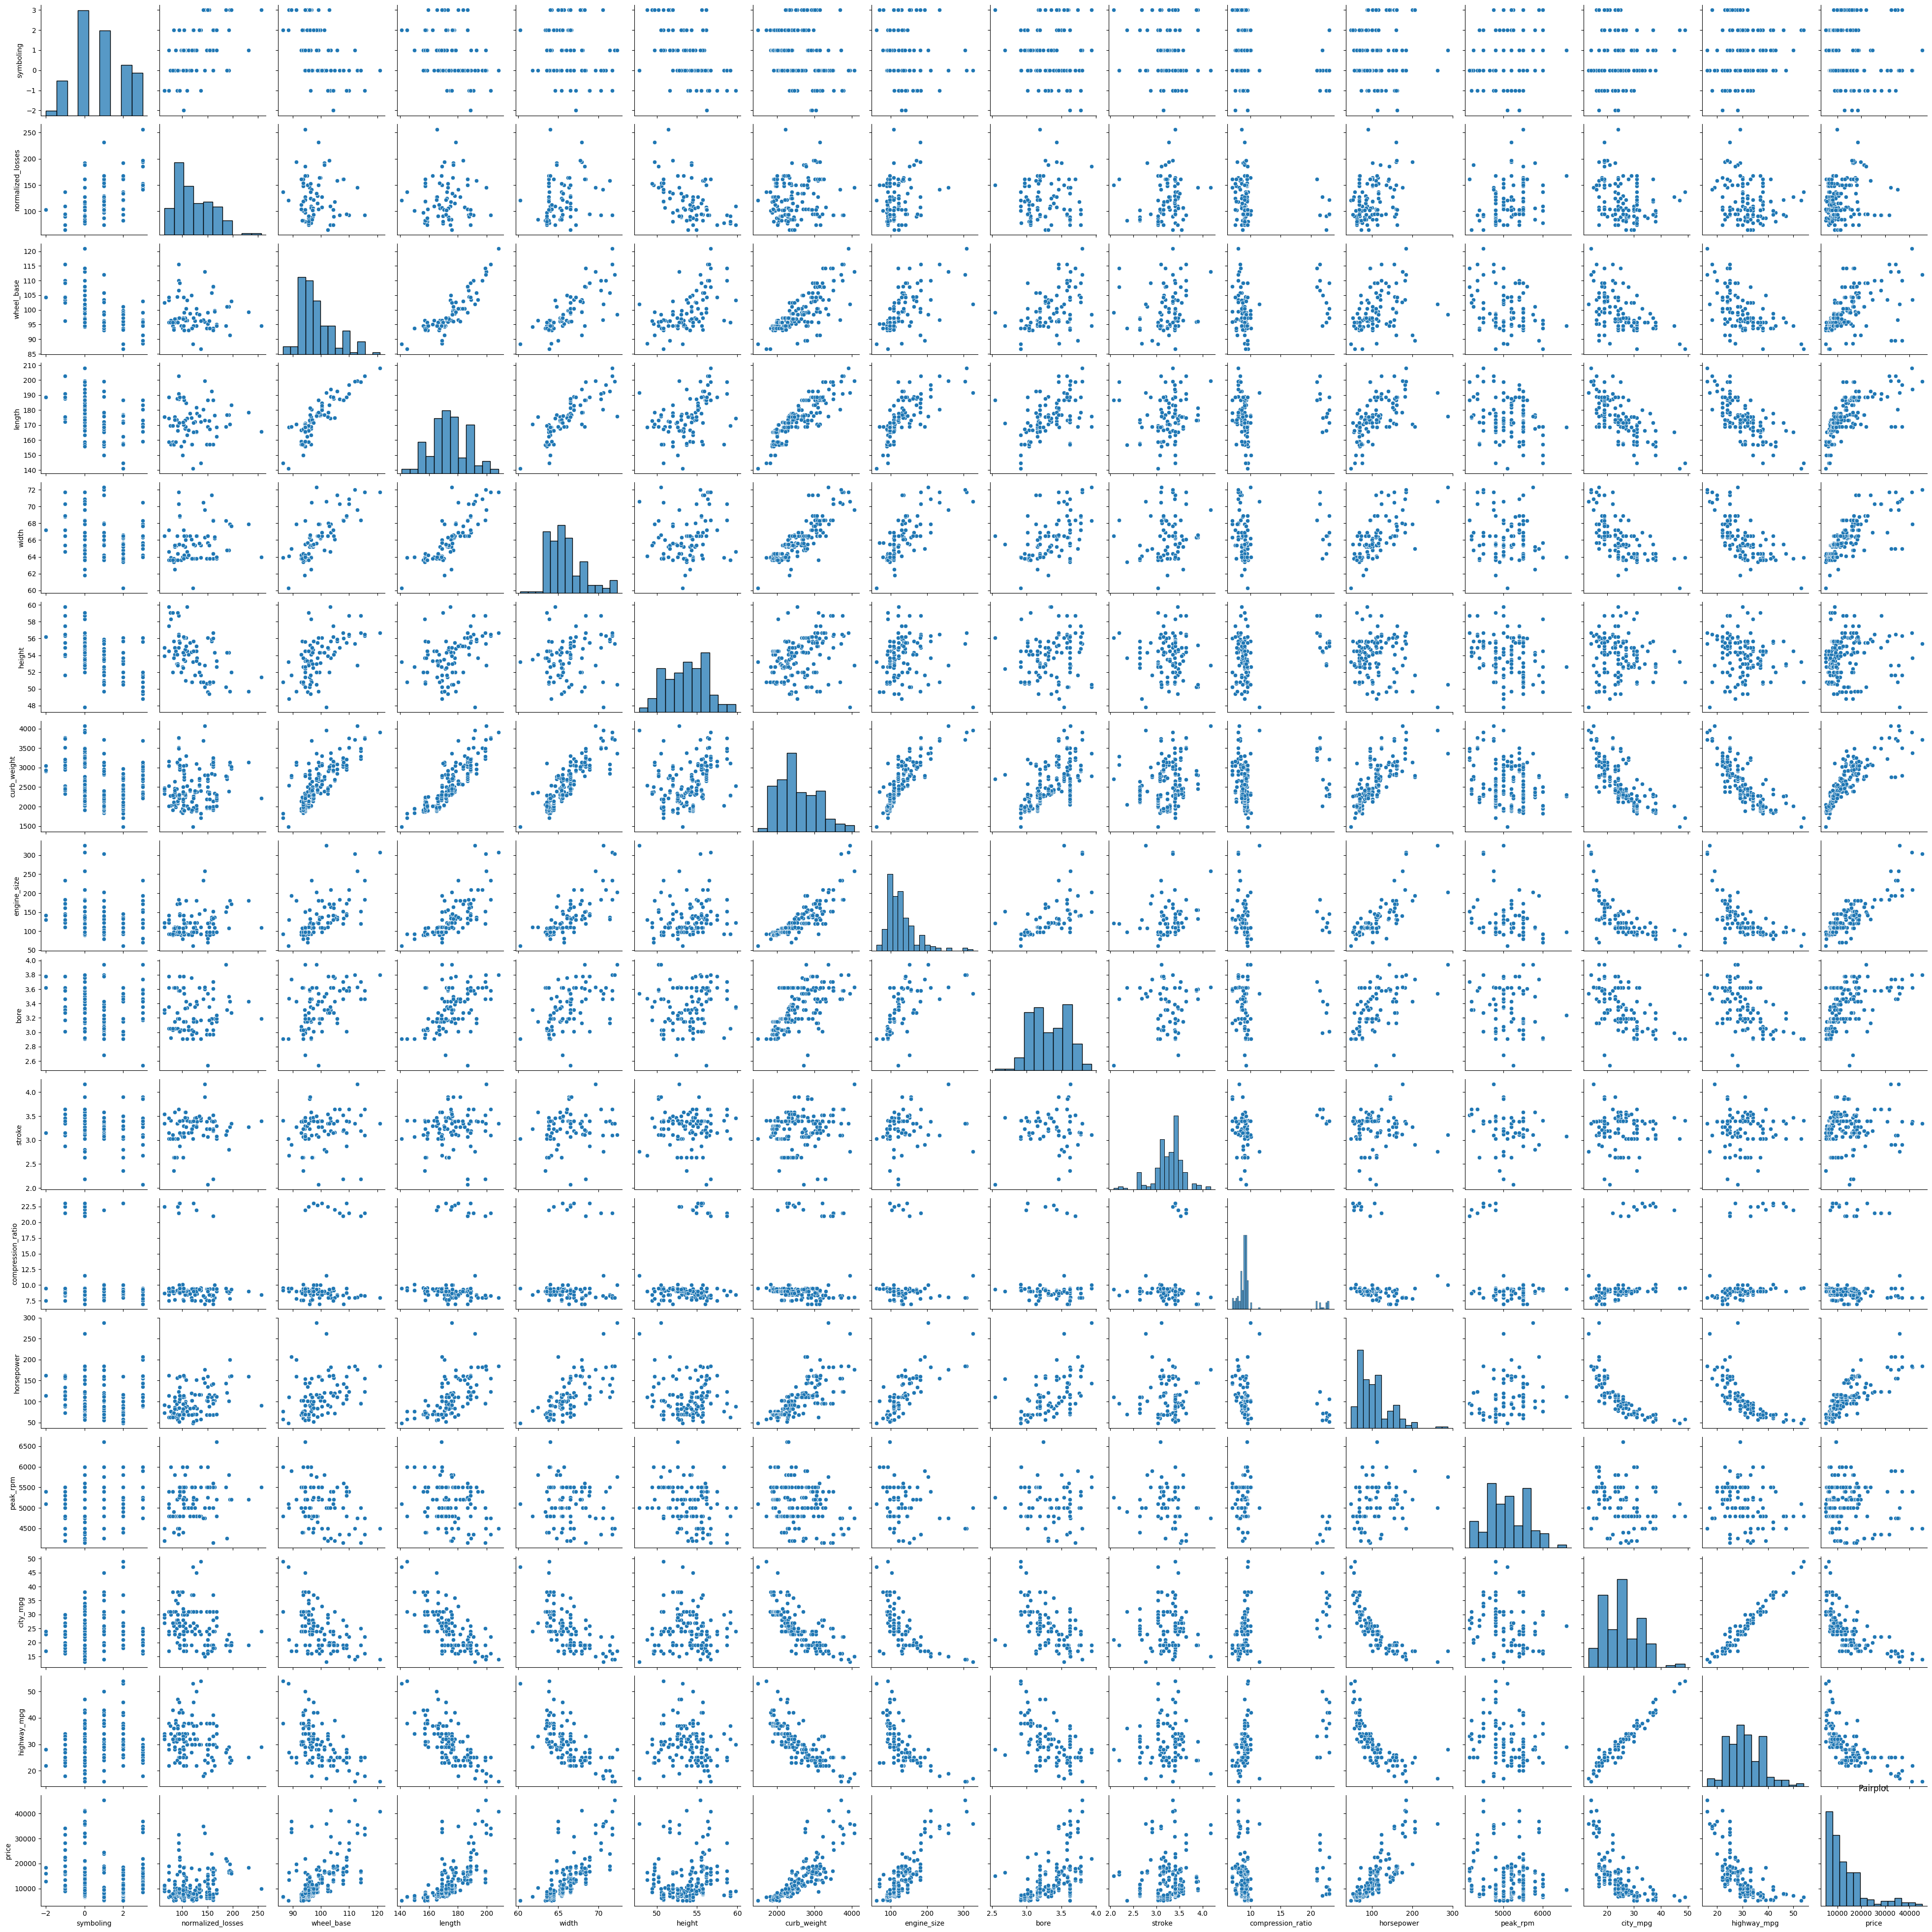

In [ ]:
#Pairplot for comparing individual numeric features with Target variables
sns.pairplot(df[num_list])
plt.title("Pairplot")
plt.xticks(rotation = 90)
print("\n")
plt.show()

In [ ]:
#Correlation table for explaining the correalations between the variables in a better way
df[num_list].corr()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,0.528667,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.134205,-0.008965,-0.178515,0.071622,0.274573,-0.035823,0.034606,-0.082391
normalized_losses,0.528667,1.000000,-0.074362,0.023220,0.105073,-0.432335,0.119893,0.167365,-0.036167,0.065627,-0.132654,0.295772,0.264597,-0.258502,-0.210768,0.203254
wheel_base,-0.531954,-0.074362,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.490378,0.161477,0.249786,0.352297,-0.361052,-0.470414,-0.544082,0.584642
length,-0.357612,0.023220,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.607480,0.129739,0.158414,0.555003,-0.287325,-0.670909,-0.704662,0.690628
width,-0.232919,0.105073,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559204,0.182956,0.181129,0.642482,-0.219957,-0.642704,-0.677218,0.751265
height,-0.541038,-0.432335,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.176195,-0.056999,0.261214,-0.110711,-0.322272,-0.048640,-0.107358,0.135486
curb_weight,-0.227691,0.119893,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.649045,0.168929,0.151362,0.751034,-0.266306,-0.757414,-0.797465,0.834415
engine_size,-0.105790,0.167365,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.594090,0.206675,0.028971,0.810773,-0.244618,-0.653658,-0.677470,0.872335
bore,-0.134205,-0.036167,0.490378,0.607480,0.559204,0.176195,0.649045,0.594090,1.000000,-0.055909,0.005203,0.577273,-0.264269,-0.594584,-0.594572,0.543436
stroke,-0.008965,0.065627,0.161477,0.129739,0.182956,-0.056999,0.168929,0.206675,-0.055909,1.000000,0.186170,0.090254,-0.071493,-0.042906,-0.044528,0.082310


In [ ]:
# This block of code has been referred from plotly.com
import plotly.express as px

# Calculate the correlation matrix
corr_matrix = df[num_list].corr()

# Create the heatmap using Plotly
fig = px.imshow(corr_matrix,
                x=corr_matrix.columns,
                y=corr_matrix.columns,
                color_continuous_scale='RdBu_r',
                zmin=-1, zmax=1,
                text_auto=True)

# Customize the layout for better readability
fig.update_layout(
    title='Correlation Matrix',
    width=900,  # Adjust figure width
    height=900,  # Adjust figure height
    font=dict(size=14),  # Increase font size
    margin=dict(l=100, r=100, t=100, b=100)  # Adjust margins
)

# Show the plot
fig.show()


In [ ]:
#List showing correlation of numeric variables with target variable
df[num_list].corr()['curb_weight'].sort_values(ascending = False)

,curb_weight
curb_weight,1.000000
length,0.877728
width,0.867032
engine_size,0.850594
price,0.834415
wheel_base,0.776386
horsepower,0.751034
bore,0.649045
height,0.295572
stroke,0.168929


Below mentioned are the insights based on the EDA:

**Engine_size (0.85)**: This strong positive correlation indicates that larger engine sizes generally correspond to heavier vehicles. This feature will likely be a very important predictor of curb_weight.

**Length (0.87)**:Longer cars tend to weigh more. This feature has one of the highest correlations with curb_weight, so it’s likely to be a key variable in your model.

**Width (0.84)**: Similar to length, wider cars are also heavier, making this feature another significant predictor.

**Horsepower (0.84)**: Vehicles with more horsepower tend to have higher curb_weight, as larger and more powerful engines add to the weight.

**City_mpg (-0.76) and Highway_mpg (-0.80)**: Heavier cars tend to have lower fuel efficiency. While this is a strong correlation, these features are negatively correlated with curb_weight, which could make them useful in a negative direction in the model, but they won’t help you directly predict curb_weight—they rather show the inverse relationship with efficiency.

Based on this analysis below mentioned features could act as good predictors:

Length, Width, Engine_size, and horsepower are the strongest predictors based on their high positive correlation with curb_weight.
City_mpg and Highway_mpg can provide additional insights, but their negative relationship with curb_weight means they may need careful consideration when included in the model.

In [ ]:
# peak_rpm is not that significant compared to other variable. However, choosing this variable as suggested in the assignment problem statement.
# Replacing the dataframe with chosen variables
df = df[['height', 'width', 'length', 'wheel_base','engine_size', 'horsepower', 'peak_rpm', 'city_mpg','curb_weight']]

In [ ]:
# Sample of data after previous step.
df.head()

,height,width,length,wheel_base,engine_size,horsepower,peak_rpm,city_mpg,curb_weight
0,48.8,64.1,168.8,88.6,130,111.0,5000.0,21,2548
1,48.8,64.1,168.8,88.6,130,111.0,5000.0,21,2548
2,52.4,65.5,171.2,94.5,152,154.0,5000.0,19,2823
3,54.3,66.2,176.6,99.8,109,102.0,5500.0,24,2337
4,54.3,66.4,176.6,99.4,136,115.0,5500.0,18,2824


## **Step 3 : Preparing Data for Modelling**

# **Null value Treatment**





In [ ]:
# Function to return sum of null values for each column
def nullsum(df):
  return df.isnull().sum()


In [ ]:
#Invoking Function
nullsum(df)

,0
height,0
width,0
length,0
wheel_base,0
engine_size,0
horsepower,2
peak_rpm,2
city_mpg,0
curb_weight,0


#  Missing values treatment:

In [ ]:
#  peak_rpm ad horsepower contains 2 missing variables hence we need to fill or impute the values

In [ ]:
# To understand the data types of the features
df.dtypes

,0
height,float64
width,float64
length,float64
wheel_base,float64
engine_size,int64
horsepower,float64
peak_rpm,float64
city_mpg,int64
curb_weight,int64


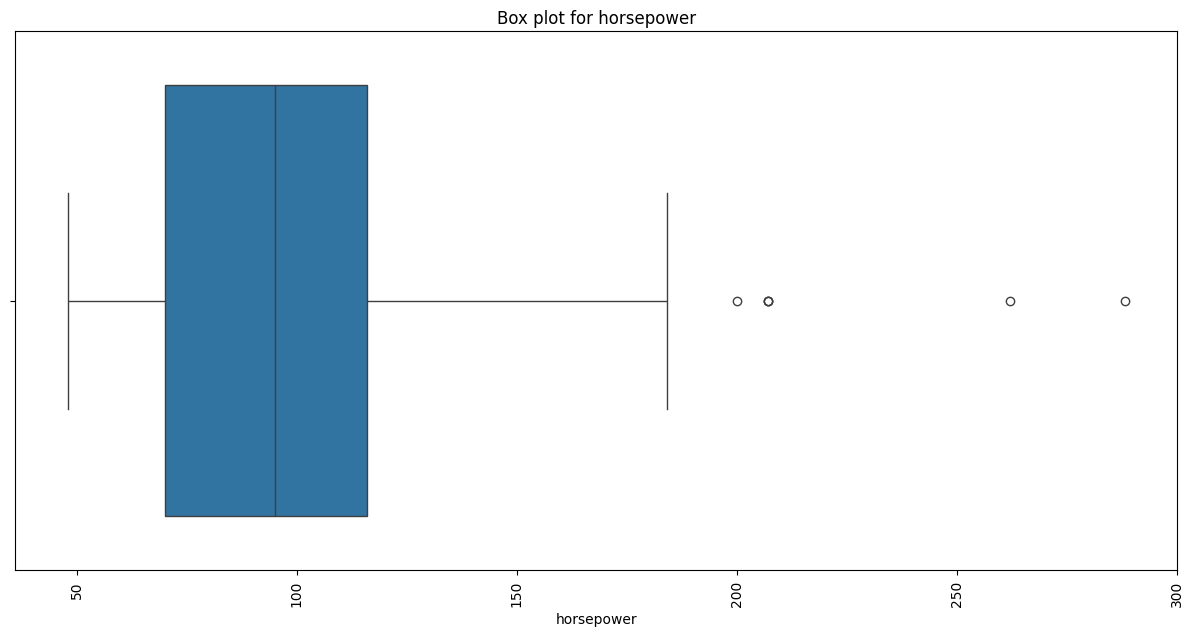

In [ ]:
#Box plot to understand the distribution of horsepower feature
plt. figure(figsize=(15, 7))
sns.boxplot(x= df['horsepower'])
plt.title("Box plot for horsepower")
plt.xlabel('horsepower')
plt.xticks(rotation = 90)
print("\n")
plt.show()

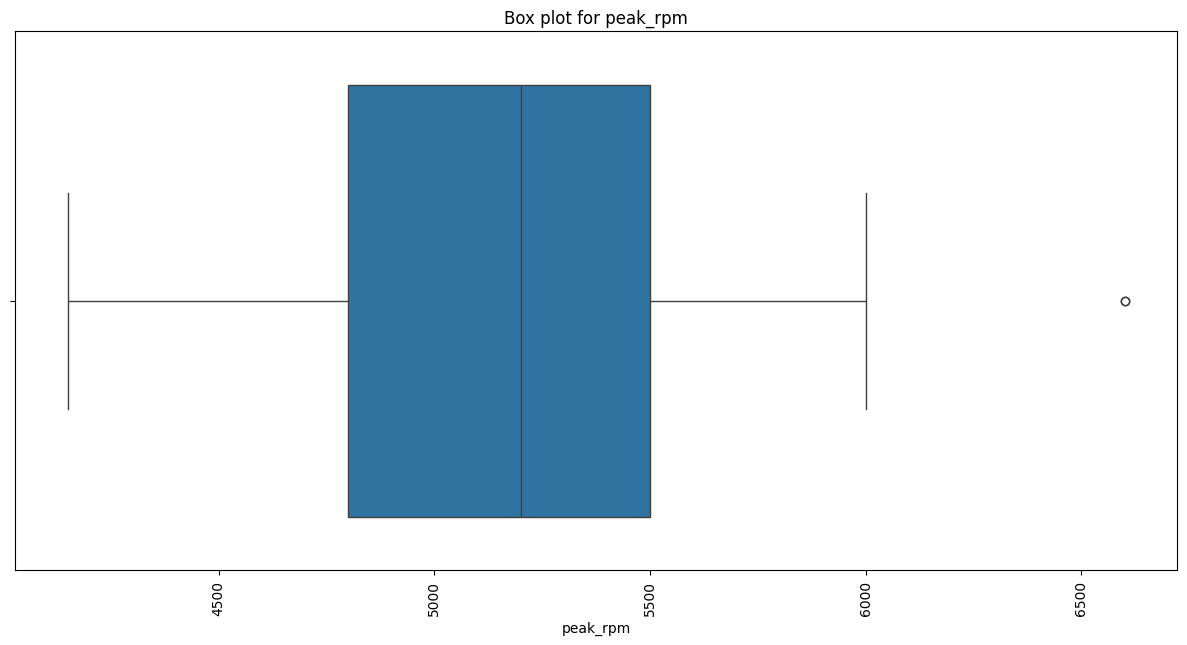

In [ ]:
#Box plot to understand the distribution of peak_rpm feature.
plt. figure(figsize=(15, 7))
sns.boxplot(x=df['peak_rpm'])
plt.title("Box plot for peak_rpm")
plt.xlabel('peak_rpm')
plt.xticks(rotation = 90)
print("\n")
plt.show()

# Replaced missing values with median

In [ ]:
median_hp = np.median(df[~df['horsepower'].isna()].horsepower)
median_rpm = np.median(df[~df['peak_rpm'].isna()].horsepower)

In [ ]:
df.horsepower = df.horsepower.fillna(median_hp)

In [ ]:
df.peak_rpm = df.peak_rpm.fillna(median_rpm)

In [ ]:
df.horsepower.dtypes

dtype('float64')

In [ ]:
nullsum(df)

,0
height,0
width,0
length,0
wheel_base,0
engine_size,0
horsepower,0
peak_rpm,0
city_mpg,0
curb_weight,0


In [ ]:
df.dtypes

,0
height,float64
width,float64
length,float64
wheel_base,float64
engine_size,int64
horsepower,float64
peak_rpm,float64
city_mpg,int64
curb_weight,int64


## **Step 4 : Creating and Training Linear Models**

# Linear models

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


def LM_metrics(y_test, y_pred):
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r_squared = r2_score(y_test, y_pred)
  print('Mean_Squared_Error :' ,mse)
  print('Root_Mean_Squared_Error :' ,rmse)
  print('r_square_value :',r_squared)

### LM_metrics:
This above function is used to test how well our ML model is performing on unknown data, i.e on test data set. Metrics used are:

1.   Mean Squared error(MSE)
2.   Root Mean Squared error (RMSE)
3.   R2 value



# Statsmodel
Here we have used statsmodel to build Linear regression model.

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split  # this is used to split the data into training and testing set.

In [ ]:
X = df.drop('curb_weight', axis = 1)
X = sm.add_constant(X)    # this is used to add constant variable to indenpendent set as y = mx + c, here this function adds that 'c' term .
y = df["curb_weight"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=72)   # Here we are splitting the data into training and test set where training accounts to 70% while test 30%

# function for kfold

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

def kfoldcv(X_train_sm,y_t):
  # Kfolds cv where splits = 5
  kf = KFold(n_splits=5)
  # List to store R^2 scores
  r2_scores = []

  # K-Fold Cross Validation
  for train_index, test_index in kf.split(X_train_sm):
      X_train, X_test = X_train_sm.iloc[train_index], X_train_sm.iloc[test_index]
      y_train, y_test = y_t.iloc[train_index], y_t.iloc[test_index]

      # Fit the OLS model
      model = sm.OLS(y_train, X_train).fit()

      # Predict on the test data
      y_pred = model.predict(X_test)

      # Calculate R^2 for the test set
      r_squared = r2_score(y_test, y_pred)
      r2_scores.append(r_squared)

  # Print the R^2 scores for each fold
  print("Cross-validated R^2 scores:", r2_scores)
  print("Mean R^2 score:", np.mean(r2_scores))
  print("std R^2 score:", np.std(r2_scores))


## **Step 5 : Model Compaison and Evaluation**

# By using Statsmodel

#Model 1 :sm1

In [ ]:
# Fit the resgression line using 'OLS'
sm1 = sm.OLS(y_train, X_train).fit()
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(sm1.summary())

                            OLS Regression Results                            
Dep. Variable:            curb_weight   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     235.1
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           5.98e-75
Time:                        19:16:03   Log-Likelihood:                -903.72
No. Observations:                 143   AIC:                             1825.
Df Residuals:                     134   BIC:                             1852.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2951.4871    642.890     -4.591      

# K fold cross validation for K = 5 and statsmodel LR model = sm1

In [ ]:
kfoldcv(X_train,y_train)

Cross-validated R^2 scores: [0.9267957075573501, 0.9358683801064716, 0.9384517188466281, 0.9295518619198188, 0.877989405451063]
Mean R^2 score: 0.9217314147762663
std R^2 score: 0.02226922626252019


#Test Data for model sm1


In [ ]:
y_pred = sm1.predict(X_test)
LM_metrics(y_test, y_pred)

Mean_Squared_Error : 36156.12320224823
Root_Mean_Squared_Error : 190.14763527913837
r_square_value : 0.863511592388877


# Model 1:


*   All 8 independent variables are used to build the model
*   R2 and adjusted R2 value are well within the range
*   Model sm1 can be considered as good model by considering the mean cv results of R2 score.
*   There are certain variables whose p value is greater than 0.05 and coffecient values are close to zero.
* Results of RMSE is around 190 and r2 value is also acceptable.






#Drop peak_rpm from df
coefficient value of peak_rpm  is close to zero and p value is 0.651 hence this can be considered as insignificant varaible and can be dropped.

In [ ]:
df1 = df.drop("peak_rpm", axis = 1)
X = df1.drop('curb_weight', axis = 1)
y = df1["curb_weight"]
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=72)

#Model2 : sm2


In [ ]:
# Fit the resgression line using 'OLS'
sm2 = sm.OLS(y_train, X_train).fit()
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(sm2.summary())

                            OLS Regression Results                            
Dep. Variable:            curb_weight   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     270.3
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           3.88e-76
Time:                        19:16:03   Log-Likelihood:                -903.83
No. Observations:                 143   AIC:                             1824.
Df Residuals:                     135   BIC:                             1847.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3020.9114    622.591     -4.852      

In [ ]:
kfoldcv(X_train,y_train)

Cross-validated R^2 scores: [0.9267455278605641, 0.935577987833024, 0.9406464250852529, 0.9363054244301374, 0.8792744002130677]
Mean R^2 score: 0.9237099530844093
std R^2 score: 0.022671891426408013


#Test Data for model sm2

In [ ]:
y_pred = sm2.predict(X_test)
LM_metrics(y_test, y_pred)

Mean_Squared_Error : 36494.88866729522
Root_Mean_Squared_Error : 191.03635430800918
r_square_value : 0.8622327617294265


# Model 2:


*   peak_rpm is dropped there by considering 7 variables.
*   R2 and adjusted R2 value are well within the range and there is no significant changes
*   Model sm2 can also be considered as good model by considering the mean cv results of R2 score.
*   There are certain variables whose p value is greater than 0.05 and coffecient values are close to zero.
* Results of RMSE is around 191 and r2 value is also acceptable.






# Drop height from df1
coefficient value of height  is close to zero and p value is 0.374 hence this can be considered as insignificant varaible and can be dropped.

In [ ]:
df2 = df1.drop("height", axis = 1)
X = df2.drop('curb_weight', axis = 1)
y = df2["curb_weight"]
# Add a constant to get an intercept
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=72)

#Model3 :sm3

In [ ]:


# Fit the resgression line using 'OLS'
sm3 = sm.OLS(y_train, X_train).fit()
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(sm3.summary())

                            OLS Regression Results                            
Dep. Variable:            curb_weight   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     315.7
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           3.11e-77
Time:                        19:16:03   Log-Likelihood:                -904.25
No. Observations:                 143   AIC:                             1823.
Df Residuals:                     136   BIC:                             1843.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3255.8164    563.751     -5.775      

In [ ]:
kfoldcv(X_train,y_train)

Cross-validated R^2 scores: [0.9255713041772582, 0.9347890821167362, 0.942898193799075, 0.9354804706628885, 0.8787050277886803]
Mean R^2 score: 0.9234888157089276
std R^2 score: 0.023057077811270938


#Test Data for model sm3

In [ ]:
y_pred = sm3.predict(X_test)
LM_metrics(y_test, y_pred)

Mean_Squared_Error : 34929.76076093083
Root_Mean_Squared_Error : 186.89505279950785
r_square_value : 0.8681410781286283


# Model 3:


*   peak_rpm and height is dropped there by considering 6 variables.
*   R2 and adjusted R2 value are well within the range and there is no significant changes compared to previous model.
*   Model sm3 can also be considered as good model by considering the mean cv results of R2 score.
*   There are certain variables whose p value is greater than 0.05 and coffecient values are close to zero.
* Results of RMSE is around 186 and r2 value is also acceptable which is good compared to previous model results on test data.






#Drop horsepower from df2

coefficient value of horsepower  is close to zero and p value is 0.079 hence this can be considered as insignificant varaible and can be dropped.

In [ ]:
df3 = df2.drop("horsepower", axis = 1)
X = df3.drop('curb_weight', axis = 1)
y = df3["curb_weight"]
# Add a constant to get an intercept
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=72)

#Model4 :sm4

In [ ]:

# Fit the resgression line using 'OLS'
sm4 = sm.OLS(y_train, X_train).fit()
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(sm4.summary())

                            OLS Regression Results                            
Dep. Variable:            curb_weight   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     372.4
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           7.16e-78
Time:                        19:16:03   Log-Likelihood:                -905.88
No. Observations:                 143   AIC:                             1824.
Df Residuals:                     137   BIC:                             1842.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3147.5740    564.767     -5.573      

In [ ]:
kfoldcv(X_train,y_train)

Cross-validated R^2 scores: [0.92182323723578, 0.9327355417939528, 0.9473217892895804, 0.9404142366843362, 0.8743462473687097]
Mean R^2 score: 0.9233282104744719
std R^2 score: 0.025913778777703997


#Test Data for model sm4

In [ ]:
y_pred = sm4.predict(X_test)
LM_metrics(y_test, y_pred)

Mean_Squared_Error : 35861.61163373179
Root_Mean_Squared_Error : 189.37162309525624
r_square_value : 0.8646233657608453


# Model 4:


*   peak_rpm,height and horsepower is dropped there by considering 5 variables.
*   R2 and adjusted R2 value are well within the range and there is no significant changes compared to previous model.
*   Model sm4 can also be considered as good model by considering the mean cv results of R2 score.
* Results of RMSE is around 189 and r2 value is also acceptable which is good.






# Drop engine_size from df3
coefficient value of engine_size  is close to zero, we will try to build the model weather the model yeilds the good results or not by dropping engine_size.

In [ ]:
df4 = df3.drop("engine_size", axis = 1)
X = df4.drop('curb_weight', axis = 1)
y = df4["curb_weight"]
# Add a constant to get an intercept
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=72)

# Model5: sm5

In [ ]:
# Fit the resgression line using 'OLS'
sm5 = sm.OLS(y_train, X_train).fit()
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(sm5.summary())

                            OLS Regression Results                            
Dep. Variable:            curb_weight   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     225.4
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           1.85e-59
Time:                        19:16:03   Log-Likelihood:                -953.14
No. Observations:                 143   AIC:                             1916.
Df Residuals:                     138   BIC:                             1931.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5341.1561    735.629     -7.261      0.0

In [ ]:
kfoldcv(X_train,y_train)

Cross-validated R^2 scores: [0.8528040475513321, 0.8494958049413839, 0.8559225991356443, 0.8505432287717873, 0.865730002725897]
Mean R^2 score: 0.8548991366252089
std R^2 score: 0.005846613733464956


# Test data model 5

In [ ]:
y_pred = sm5.predict(X_test)
LM_metrics(y_test, y_pred)

Mean_Squared_Error : 40822.111269034045
Root_Mean_Squared_Error : 202.04482490040186
r_square_value : 0.8458976110002834


# Model 5:
After dropping the engine_size from df3, there is significant drop in r2 and adj_r2 value also  RMSE value increased to 202 which resulted a bad model. hence we can consider previous model were better. This states that by further dropping the variables only yeilds bad model.





In [ ]:
sm3.params

,0
const,-3255.816357
width,31.404698
length,9.214761
wheel_base,17.808255
engine_size,4.402983
horsepower,1.239639
city_mpg,-12.448500


# Saving the model as sav file

In [ ]:
import joblib
# save model with joblib
filename = 'best_ML_Model.sav'
joblib.dump(sm3, filename)

['best_ML_Model.sav']

# Conclusion:
Through the Exploratory Data Analysis, several important insights were uncovered. The target variable, curb-weight, appears to have a significant relationship with some of the predictor variables, such as engine-size, horsepower, and length. These variables exhibit strong positive correlations with the vehicle’s curb weight, suggesting that they may serve as strong predictors in our regression model.

Training and Testing data is divided into **70 : 30** split. Initially model is created by considering all the variables to understand what would be expected output. It turned out to be good but, some variables didn't contributed hence Manual approach is used where we use coefficient value and p value to drop variables that are not significant and we were able to have good model at 3rd iteration. Model 4 can also be considered but there is slight increase in RMSE value while testing. Hence, **Model3(sm3)** can be considered as good fit.

Final equation for model is: \
y_pred = -3255.816357 + (31.404698)(width) + (9.214761)(length)+(17.808255)(wheel_base)+(4.402983)(engine_size)+(1.239639)(horsepower)+(-12.4485)(city_mpg)